# IMPORT LIBRARIES


In [36]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt


## Import Dataset


In [11]:
df=pd.read_csv(r"C:\Users\rucch\OneDrive\Documents\Desktop\Acadamics\Numerical Analysis Project\Student_Performance.csv")
df["Extracurricular Activities"] = df["Extracurricular Activities"].map({"Yes": 1, "No": 0})


## Define X and y 

In [16]:
X=df.drop(['Performance Index'],axis=1).values
y=df['Performance Index'].values

## Split the dataset into training and test set

In [74]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# *Regression Model 1: From Scratch Implementation


In [75]:
class MultipleLinearRegression:
    def __init__(self, learning_rate=0.0001, epochs=1000):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.weights = None
        self.bias = None

    def predict(self, X):
        return np.dot(X, self.weights) + self.bias

    def mean_squared_error(self, y, y_pred):
        return np.mean((y - y_pred) ** 2)

    def r2_score(self, y, y_pred):
        ss_res = np.sum((y - y_pred) ** 2)
        ss_tot = np.sum((y - np.mean(y)) ** 2)
        return 1 - (ss_res / ss_tot)

    def fit(self, X, y):
        m, n = X.shape

        self.weights = np.zeros(n)
        self.bias = 0

        for _ in range(self.epochs):
            y_pred = self.predict(X)

            dw = (1 / m) * np.dot(X.T, (y_pred - y))
            db = (1 / m) * np.sum(y_pred - y)

            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db




In [76]:
def z_score(X: np.ndarray) -> tuple:
    '''
    Z-score normalization (feature-wise)
    '''
    # Mean and standard deviation for each feature (column)
    x_mean = np.mean(X, axis=0)
    x_std = np.std(X, axis=0)

    # Prevent division by zero
    x_std[x_std == 0] = 1

    # Z-score normalization
    x = (X - x_mean) / x_std

    return x, x_mean, x_std


In [77]:
x_train, x_mean, x_std = z_score(X_train)
x_test = (X_test - x_mean) / x_std

In [94]:

  model=MultipleLinearRegression()
  model.fit(X_train,y_train)
  y_pred1= model.predict(X_test)

print("MSE loss: ", np.mean((y_pred1 - y_test) ** 2))
print("Test R2:", model.r2_score(y_test, y_pred1))

MSE loss:  43.925371684118254
Test R2: 0.872347963945223


## Plot

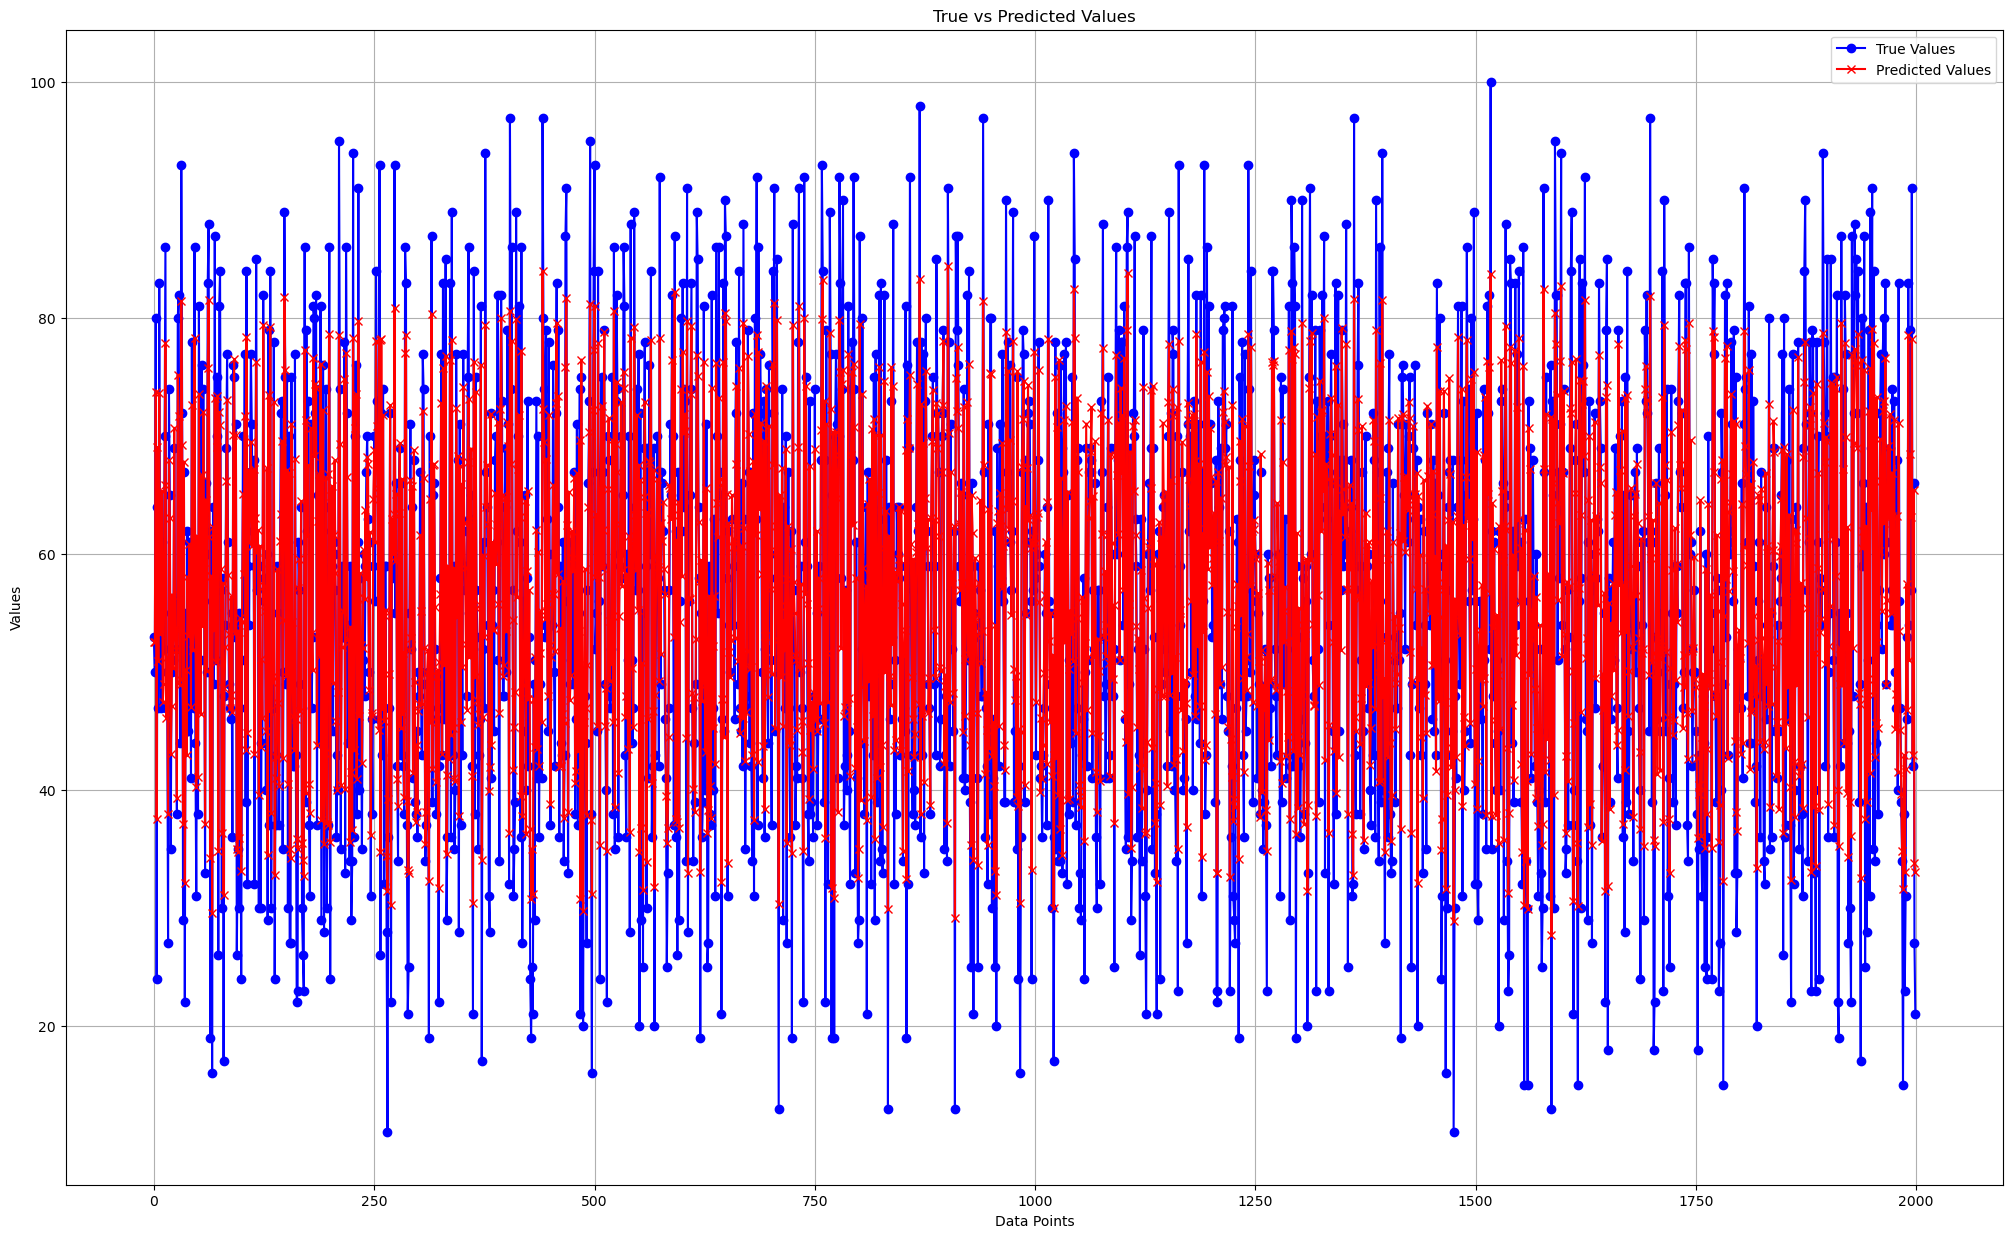

In [95]:
indices = np.arange(len(y_test))
plt.figure(figsize=(25, 15))
plt.plot(indices, y_test, label='True Values', color='blue', marker='o')
plt.plot(indices, y_pred1, label='Predicted Values', color='red', marker='x')

plt.xlabel('Data Points')
plt.ylabel('Values')
plt.title('True vs Predicted Values')

plt.legend()
plt.grid(True)
plt.show()


# *Regression Model 2: Scikit-learn Implementation

In [92]:
from sklearn.linear_model import LinearRegression
LR= LinearRegression()
LR.fit(X_train,y_train)

y_pred2=LR.predict(X_test)

from sklearn.metrics import r2_score
print("Test R2:", r2_score(y_test,y_pred2))

from sklearn.metrics import mean_squared_error
print("MSE loss:", mean_squared_error(y_test, y_pred2))


Test R2: 0.9880686410711422
MSE loss: 4.1056092158358295


### Plot

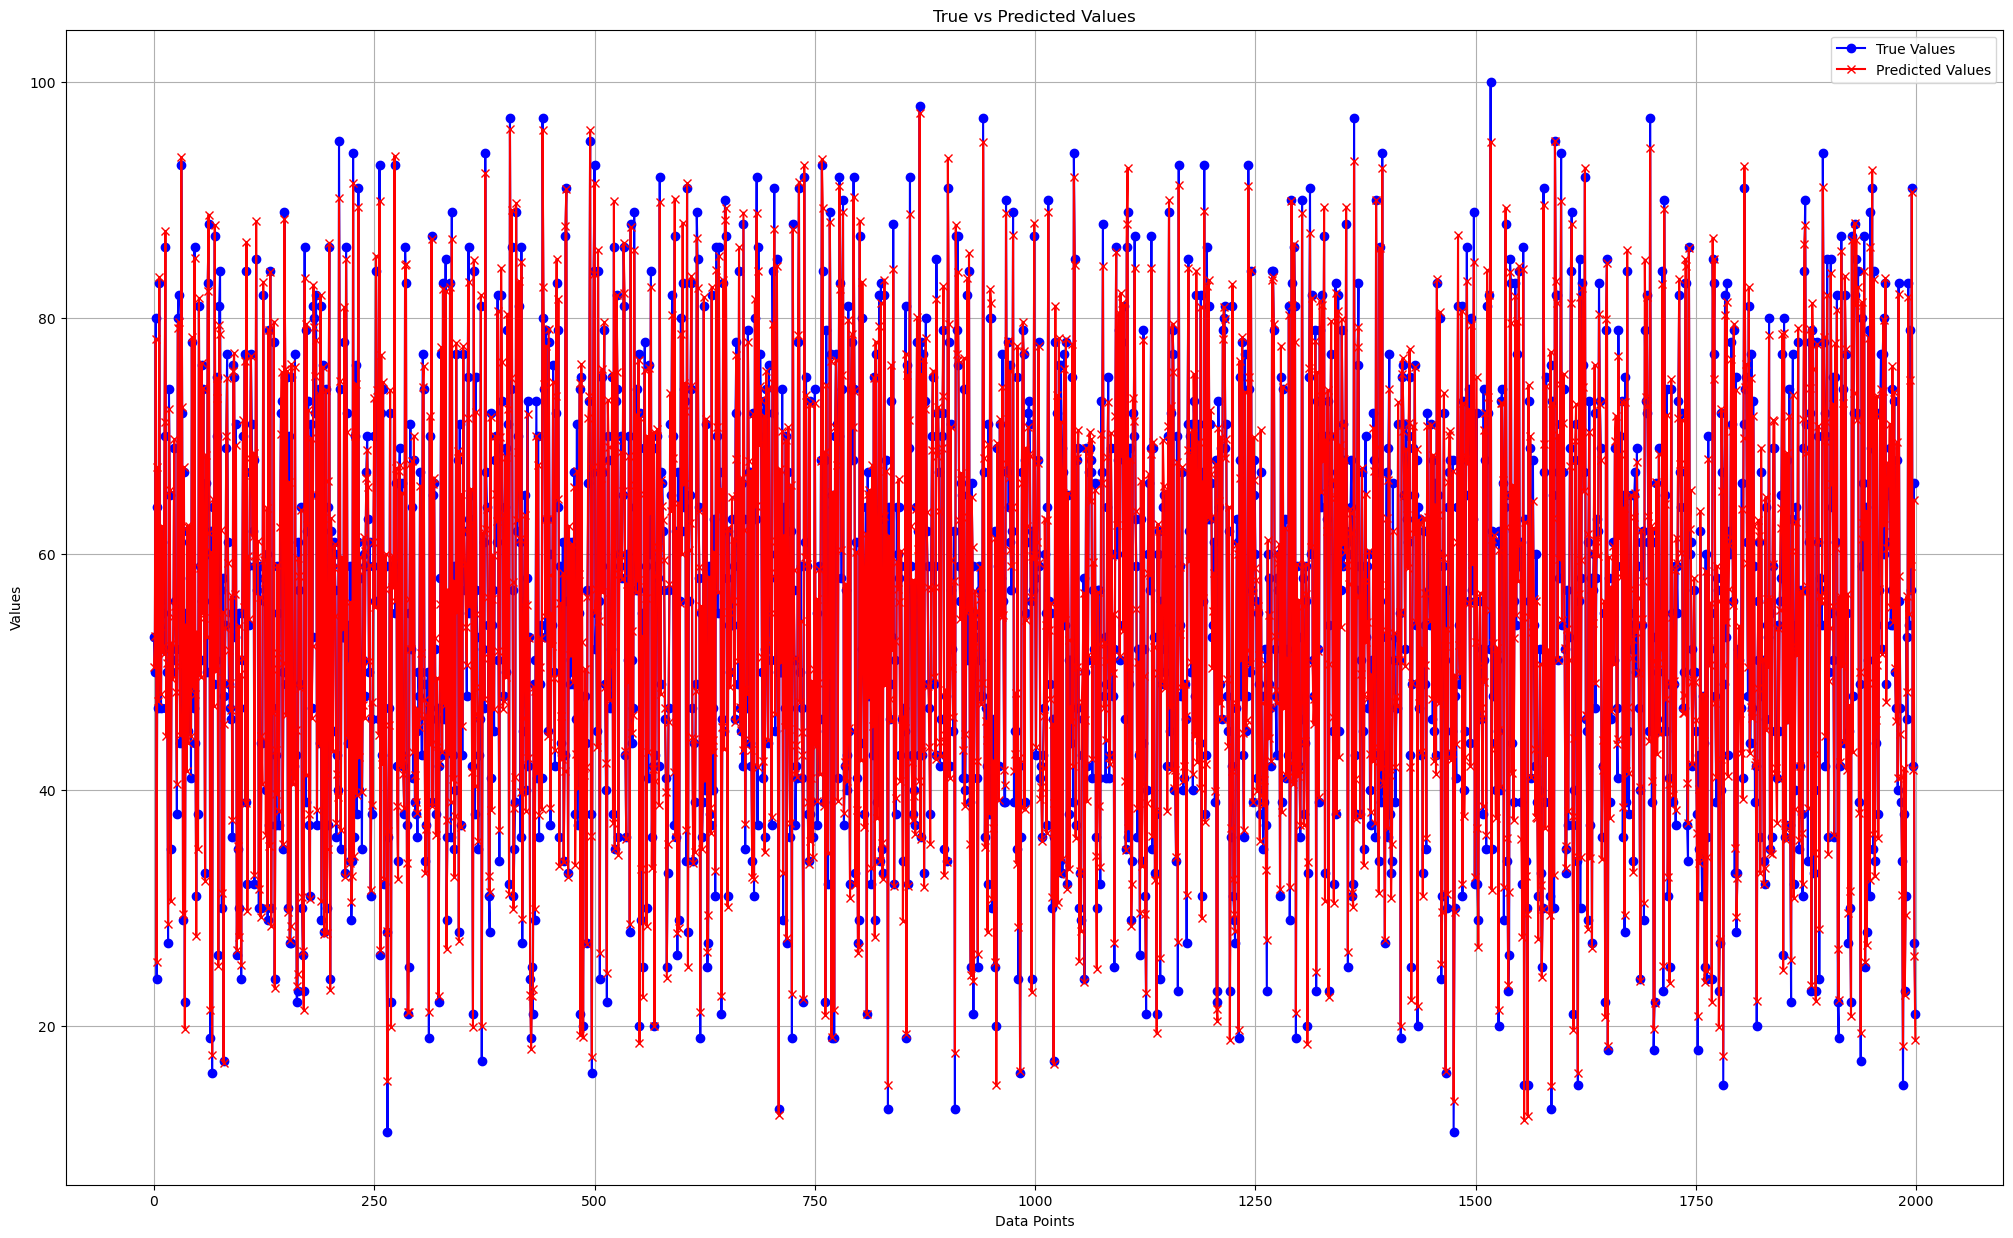

In [93]:
indices = np.arange(len(y_test))
plt.figure(figsize=(25, 15))
plt.plot(indices, y_test, label='True Values', color='blue', marker='o')
plt.plot(indices, y_pred2, label='Predicted Values', color='red', marker='x')

plt.xlabel('Data Points')
plt.ylabel('Values')
plt.title('True vs Predicted Values')

plt.legend()
plt.grid(True)
plt.show()
